<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="BS"></a><h1 style="text-align:center;">The integrated Volterra square-root process</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>


We consider an non-decreasing Volterra process $X$ of the form:
$$
X_t = \int_0^t g_0(s) ds + \int_0^t K(t-s) (b X_sds + c W_{X_s} ds) 
$$
where  $K$ is a locally integrable kernel ($L^1([0,T])$, not necessarily $L^2$) $  c \geq 0$ and $b \in \mathbb R$, $W_t$ is a standard Brownian motion and $g_0$ a suitable input curve. We will take:
$$ g_0(t) = V_0 + a \int_0^t K(r)dr, $$
with $a,V_0 \geq 0$. 

If $K\in L^2([0,T])$, then one can show using stochastic Fubini's theorem that $X$ is absolutely continuous with respect to the Lebesgue measure, i.e. $X = \int_0^{\cdot} V_s ds$ almost surely, and that the nonnegative density process $V$ satisfies a square-root stochastic Volterra equation in the form 
$$ V_t = g_0(t) + \int_0^t K(t-s) (b V_s ds + c\sqrt{V_s}dW_s). $$
In particular for the fractional kernel 
$$ K_H(t) = \frac{1}{\Gamma(H+0.5)}t^{H-1/2}, $$
with $H \in (0,1/2]$ one recovers the rough square-root process used for instance to model the instanteneous variance of a stock.  In this case, $X$ plays the role of the integrated variance. 

If $H \in (-1/2,0]$, $K_H$ is no longer in $L^2$ but only in $L^1$ but still the equation for $X$ makes sense, but $X$ is no longer absolutely continuous with respect to the Lebsegue measure, and the process $V$ no longer makes sense. 

In the sequel, we will develop a simple scheme to simulate $X$ for any kernel $K \in L^1([0,T])$. We won't bother with the process $V$.  The difficult part is to construct a scheme for which $X$ is non-decreasing. 





<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="BS"></a><h1 style="text-align:center;">The scheme </h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>


Define 
$$ U_{t,s} := X_s - X_t, \quad Z_{t,s}  = \int_t^s dW_{X_u}, \quad t\leq s, $$
and
$$ g_t(s) := g_0(s) + \int_0^t K(s-u) (bdU_{0,u} + c dZ_{0,u}), \quad t < s .$$
When we write $dZ_{t,u}$ we mean differential in the second variable $u$.  (In case of square integrable kernel, $g_t(s) = \mathbb E[ V_s | \mathcal F_t]$ with $V$ the density process.)

Using the equation for $X$, the dynamics of $U$ can be written in the form
$$ U_{t,s} = \int_t^s g_t(u) du +  \int_t^s K(s-u) (b U_{t,u} + c Z_{t,u} du)  $$

We are simply going to discretize the second integral appearing  using a right-point  approximation
$$
\int_t^s K(s-u) (b U_{t,u} + c Z_{t,u} du) \approx \int_t^s K(s-u) du ( b U_{t,s} + cZ_{t,s}) = \int_0^{t-s} K(u) du  ( b U_{t,s} + cZ_{t,s})
$$


This leads to the scheme
$$ 
U_{i,i+1}  = \alpha_i + b K_{i}  U_{i,i+1} + c  K_{i}   W_{U_{i,i+1}}
$$
with 
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(u) du, \quad   K_i = \int_0^{t_{i+1}-t_{i}} K(u) du  $$

This means that, at time $t$ since we have access to $\alpha_i$, all we need to know to obtain $U_{i,i+1}$ is to simulate a random variable $X$ satisfying 
$$ X = \alpha + \sigma W_X  $$
but this is nothing than an **Inverse Gaussian** distribution 
$$ X = IG ( \alpha, (\alpha/\sigma)^2 )  $$
See https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution

# Developping expression of $\alpha_i$
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(s) ds = \int_{t_i}^{t_{i+1}} g_{0}(s) ds  + \int_{t_i}^{t_{i+1}} \int_0^{t_{i}} K(s-u) (bdU_{0,u} + c dZ_{0,u})  du ds $$
Now we observe that $d{Z_{0,u}} = dZ_{t_j,u}$ whenever, $t_j\leq u$ (similar for $U$) so that we can write:
$$   \int_0^{t_{i}} K(s-u) (bdU_{0,u} + c dZ_{0,u}) = \sum_{j=0}^{i-1} \int_{t_{j}}^{t_{j+1}} K(s-u)  (bdU_{{t_j},u} + c dZ_{{t_j},u}),   $$
so that an application of Fubini yields 
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(s) ds = \sum_{j=0}^{i-1}  \int_{t_{j}}^{t_{j+1}}  \left(  \int_{t_i}^{t_{i+1}}  K(s-u)ds \right) (bdU_{t_{j},u} + c dZ_{t_j,u})  du \approx \sum_{j=0}^{i-1}  K_{ij}  \int_{t_{j}}^{t_{j+1}}  (bdU_{t_{j},u} + c dZ_{t_j,u})  du = \sum_{j=0}^{i-1}  K_{ij} (b U_{t_{j},t_{j+1}} + c Z_{t_{j},t_{j+1}})   ,  $$
with 

$$ K_{ij}:= \int_{t_i}^{t_{i+1}} K(s-t_j) ds, \quad j = 0,1, \ldots, i-1. $$

# Scheme 



Fix $t_0 = 0 < t_1 < \ldots < t_n = T$ a partition and  construct $(Z_{j,j+1})_{i=0,\ldots, n}$ and $(U_{i,i+1})_{i=0,\ldots, n-1}$  recursively. For each $i=0,\ldots, N-1$ 
First we compute $\alpha_i$ 
$$ \alpha_{i}  = \int_{t_i}^{t_{i+1}} g_0(s) ds + \sum_{j=0}^{i-1}   K_{ij} (b U_{j,j+1}  +  c Z_{j,j+1})  $$
with an initialization (for $i=0$) to $\alpha_0=\int_0^{t_1} g_0(s) ds$ and 
$$ K_{ij}:= \int_{t_i}^{t_{i+1}} K(s-t_j) ds, \quad j = 0,1, \ldots, i-1. $$

we  first use the expression for the integrated variance 
$$
U_{i,{i+1}}  = \alpha_i  + b K_i U_{i,i+1}   + c K_i  W_{U_{i,i+1}} .
$$
to simulate  (here we need $1-bK_i\geq 0$, but usually $b\leq 0$ so it is verified)
$$ U_{i,i+1} \sim IG \left(\frac{\alpha_i}{ 1 - b K_i}, \left(\frac{\alpha_i}{c K_i}\right)^2 \right) $$
and we set $Z_{i,i+1} = \frac{1}{c K_i}( (1-bK_i)U_{i,i+1} - \alpha_i)$.



**TO DO:** argue that $\alpha_i\geq 0$ for all $i$ so that the scheme is well-defined. Numerics say its true. Also figure out a way to recover sample paths of the variance process $V$ (when it exists) from $U$ and $Z$. 




# Comparison with the Markovian case
When $K(t)=\exp(bt)$, then one can show that $g_t(s) = E[V_s|\mathcal F_t] = V_t e^{b(t-s)} + \frac{a}{b}(1- e^{b(t-s)})$ and in this case $g_0(t) = V_0 e^{bt} +\frac{a}{b}(1- e^{b t}) $. So the expression for $g_t$ simplifies, as well as the expression for $\alpha$.  Note that $\alpha$ encodes all the non-Markovianity without additionnal information. As sanity check we implement the scheme for the exponential kernel **simulate_exp_vectorized** below here with the full alpha as above, and compared it with the scheme we implemented previsoulsy and they match...  




# Fractional kernel
$$K_H(t)=\frac{t^{H-1/2}}{\Gamma(H+0.5)} , \quad H \in (-1/2, 1/2], \quad g_0(t) = V_0 + a \frac{t^{H + 0.5}}{(H + 0.5 )\Gamma(H+0.5)} $$

The following quantities need to be computed with:

$$ \int_{t_i}^{t_{i+1}} g_0(s) ds = V_0  (t_{i+1} -t_i) +  a \frac{t_{i+1}^{H + 1.5} -t_i^{H + 1.5}}{(H + 1.5 )(H + 0.5 )\Gamma(H+0.5)}    $$
$$  K_i = \int_0^{t_{i+1} - t_i} K(u) du = \frac{(t_{i+1} -t_i)^{H + 0.5}}{(H + 0.5 )\Gamma(H+0.5)}, \quad i =0, \ldots, n.$$
$$ K_{ij} = \int_{t_i}^{t_{i+1}} K(u - t_j) du  =  \frac{(t_{i+1} -t_j)^{H + 0.5} -(t_{i} -t_j)^{H + 0.5}  }{(H + 0.5 )\Gamma(H+0.5)}, \quad j = 0, \ldots i-1, \quad  i =1, \ldots, n $$

In [1]:
%load_ext autoreload
%autoreload 2
import sys
if "../" not in sys.path:
    sys.path.append("../")

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from volterra_hawkes.iVi.iVi_volterra_vol_model import IVIVolterraVolModel
from volterra_hawkes.kernel.fractional_kernel import FractionalKernel

color_cycle = ["#5b6c64", "#B56246", "#322B4D", "#28BC9C", "#71074E"]
plt.rcParams["figure.figsize"]        = ((1 + np.sqrt(5)) / 2 * 5, 5)
plt.rcParams["figure.autolayout"]     = True
plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams["axes.grid"]             = True
plt.rcParams['axes.prop_cycle']       = matplotlib.cycler(color=color_cycle) 

In [2]:
# ---------------------------
# Model parameters
# ---------------------------
H = 0.1                   # Hurst parameter for the fractional kernel
a, b, c = 0.02, -0.3, .3  # Model coefficients
V_0 = 0.02                # Initial variance
rho = -0.7                # Correlation between Brownian motions driving price and variance

# ---------------------------
# Simulation setup
# ---------------------------
T = 1                    # Time horizon
n_steps = 300            # Number of time steps
t_grid = np.linspace(0, T, n_steps + 1)  # Discretized time grid

# ---------------------------
# Fractional kernel for Volterra process
# ---------------------------
kernel = FractionalKernel(H=H)  # Kernel operator associated with fractional integration

# ---------------------------
# Initial condition functions for the Volterra model
# ---------------------------
def g0(t):
    """Function g0(t)."""
    return V_0 + a * kernel.integrated_kernel(t)

def g0_bar(t):
    """Integrated version of g0(t)."""
    return V_0 * t + a * kernel.double_integrated_kernel(t)

# ---------------------------
# Model definition
# ---------------------------
rng = np.random.default_rng(seed=42)  # Random number generator for reproducibility
n_paths = 10                          # Number of Monte Carlo paths

# Instantiate the Volterra stochastic volatility model
model = IVIVolterraVolModel(
    is_continuous=True,            # Use the iVi scheme for continuous processes
    resolvent_flag=False,          # Whether to use the resolvent formulation
    kernel=kernel,                 # Volterra kernel
    g0_bar=g0_bar,                 # Integrated variance initializer
    rng=rng,                       # Random number generator
    b=b, c=c,                      # Model parameters
    g0=g0,                         # Variance initializer
    rho=rho                        # Correlation between Brownian motions
)

# ---------------------------
# Simulate asset paths
# ---------------------------
S, U, Z, V = model.simulate_price(n_paths=n_paths, t_grid=t_grid)

# Outputs:
#   S : simulated stock price paths
#   U : integrated variance
#   Z : subordinated process
#   V : instantaneous variance


<Figure size 1000x600 with 0 Axes>

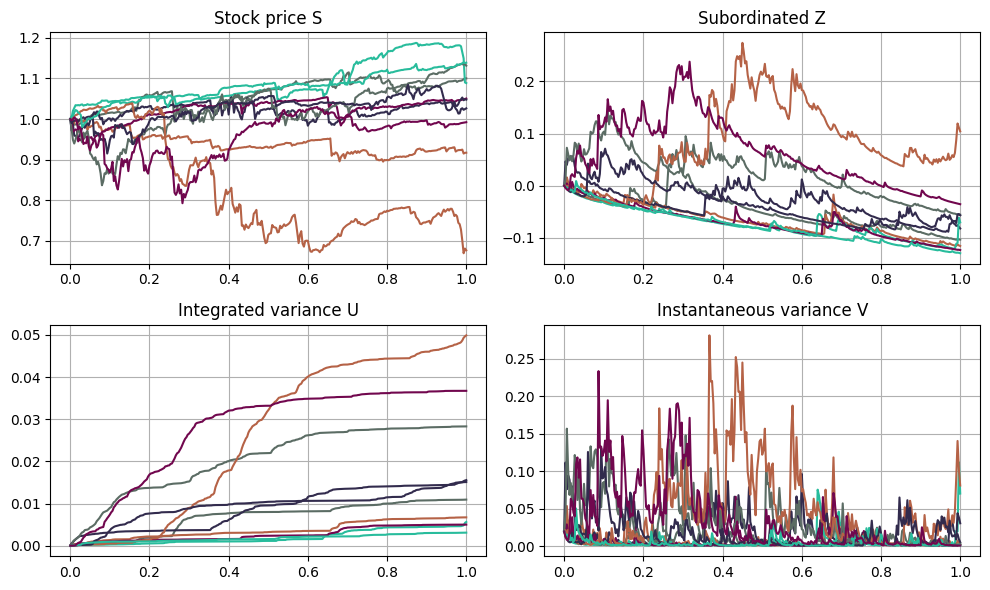

In [3]:
fig = plt.figure(figsize=(10, 6))

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0, 0].plot(t_grid, S[:, :n_paths])
axs[0, 0].set_title('Stock price S')

axs[0, 1].plot(t_grid, Z[:, :n_paths])
axs[0, 1].set_title('Subordinated Z')

axs[1, 0].plot(t_grid, U[:, :n_paths])
axs[1, 0].set_title('Integrated variance U')

axs[1, 1].plot(t_grid, V[:, :n_paths])
axs[1, 1].set_title('Instantaneous variance V')

plt.show()

# Test: Pricing under the rough Heston model

Parameters as in Figures 1, 4 and 5 in:
https://epubs.siam.org/doi/pdf/10.1137/21M1443807?casa_token=7as5_DHgp6gAAAAA:J1jlH9d5L2BPaaYkRU4xX-b9bPpk_fz8NY1OLCivmInasR55EPoAzR_-VVgbAfGAifXLGDh1RCEXIQ

In [4]:
H = 0.1
a, b, c = 0.02, - 0.3, .3
V_0 = 0.02
rho = -0.7
kernel = FractionalKernel(H=H)

def g0_bar(t):
    return V_0 * t + a * kernel.double_integrated_kernel(t)


def g0(t):
    return V_0 + a * kernel.integrated_kernel(t)


rng = np.random.default_rng(seed=42)
model = IVIVolterraVolModel(is_continuous=True, resolvent_flag=False, kernel=kernel,
                            g0_bar=g0_bar, rng=rng, b=b, c=c, g0=g0, rho=rho)

T = 1.
K = 1.
K_U = V_0

n_paths = 100_000
n_steps_list = [1, 10, 20, 30, 40, 50, 60, 70, 100, 200, 300, 500]

# Store results in a dictionary for clarity
results = {
    "call_price": {"mean": [], "std": [], "ref": 0.0572, "label": "Call on price"},
    "U": {"mean": [], "std": [], "ref": 0.028295, "label": "Mean of U"},
    "U_call": {"mean": [], "std": [], "ref": 0.013517, "label": "Call on U"},
}

# Monte Carlo simulations
for n_steps in n_steps_list:
    t_grid = np.linspace(0, T, n_steps + 1)
    S, U, Z, V = model.simulate_price(t_grid=t_grid, n_paths=n_paths)

    # Call on price
    payoff = np.maximum(S[-1] - K, 0.0)
    results["call_price"]["mean"].append(np.mean(payoff))
    results["call_price"]["std"].append(np.std(payoff))

    # Mean of U
    results["U"]["mean"].append(np.mean(U[-1]))
    results["U"]["std"].append(np.std(U[-1]))

    # Call on U
    payoff_U = np.maximum(U[-1] - K_U, 0.0)
    results["U_call"]["mean"].append(np.mean(payoff_U))
    results["U_call"]["std"].append(np.std(payoff_U))

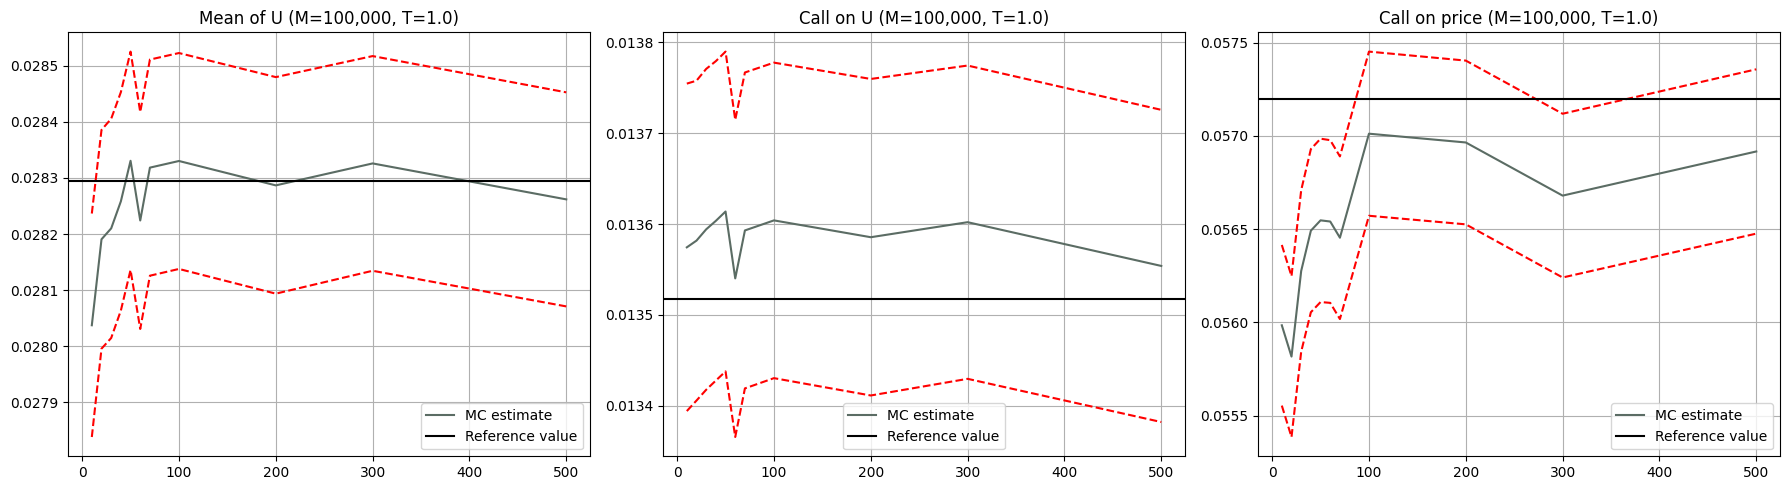

In [5]:
# Helper function for plotting with confidence intervals
def plot_with_ci(ax, x, mean, std, n_paths, ref_value, title):
    mean = np.array(mean)
    std = np.array(std)
    ci = 1.96 * std / np.sqrt(n_paths)

    ax.plot(x, mean, label="MC estimate")
    ax.plot(x, mean - ci, "r--")
    ax.plot(x, mean + ci, "r--")
    ax.axhline(y=ref_value, color="black", label="Reference value")
    ax.set_title(title)
    ax.legend()


# Plot everything in one figure
start_idx = 1
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plot_with_ci(
    axs[0], n_steps_list[start_idx:], results["U"]["mean"][start_idx:], results["U"]["std"][start_idx:],
    n_paths, results["U"]["ref"], f"{results['U']['label']} (M={n_paths:,}, T={T})"
)

plot_with_ci(
    axs[1], n_steps_list[start_idx:], results["U_call"]["mean"][start_idx:], results["U_call"]["std"][start_idx:],
    n_paths, results["U_call"]["ref"], f"{results['U_call']['label']} (M={n_paths:,}, T={T})"
)

plot_with_ci(
    axs[2], n_steps_list[start_idx:], results["call_price"]["mean"][start_idx:], results["call_price"]["std"][start_idx:],
    n_paths, results["call_price"]["ref"], f"{results['call_price']['label']} (M={n_paths:,}, T={T})"
)

plt.tight_layout()
plt.show()